# Some instructions

In [1]:
# This lets us change the eb.py file and run the notebook simultaenously,
# without having to reload the notebook every time!
% load_ext autoreload
% autoreload 2

In [18]:
import lightkurve as lk
from chromo import eb
from chromo.utils import background_correct

In [19]:
# Grab an object
tic = 'TIC 55404385'

In [20]:
# Download an FFI cut out!
raw_tpf = lk.search_tesscut(tic).download(cutout_size=[30, 30], quality_bitmask=None)

/Users/ch/K2/repos/lightkurve/lightkurve/search.py:144: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


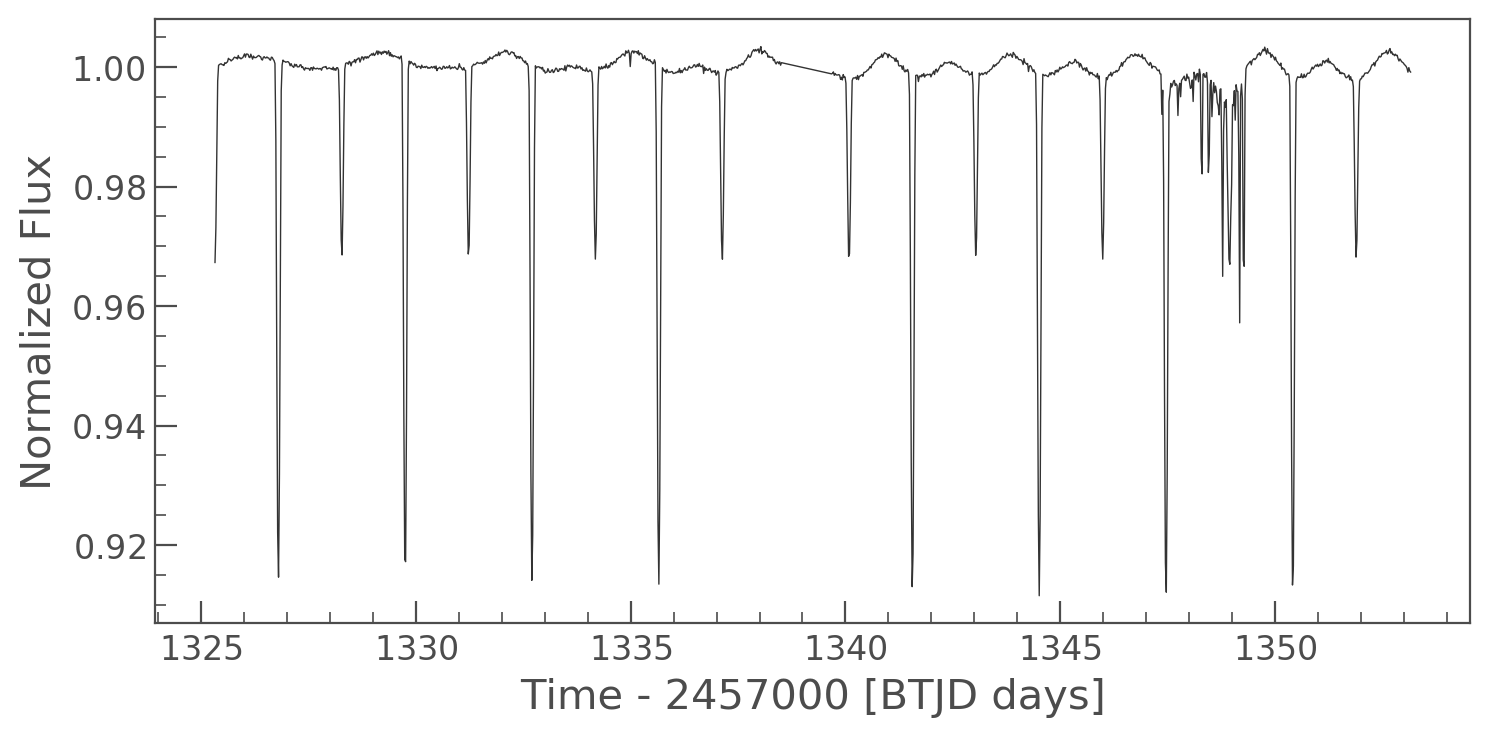

In [21]:
# Take a look!
lc = background_correct(raw_tpf).to_lightcurve()
lc.plot()

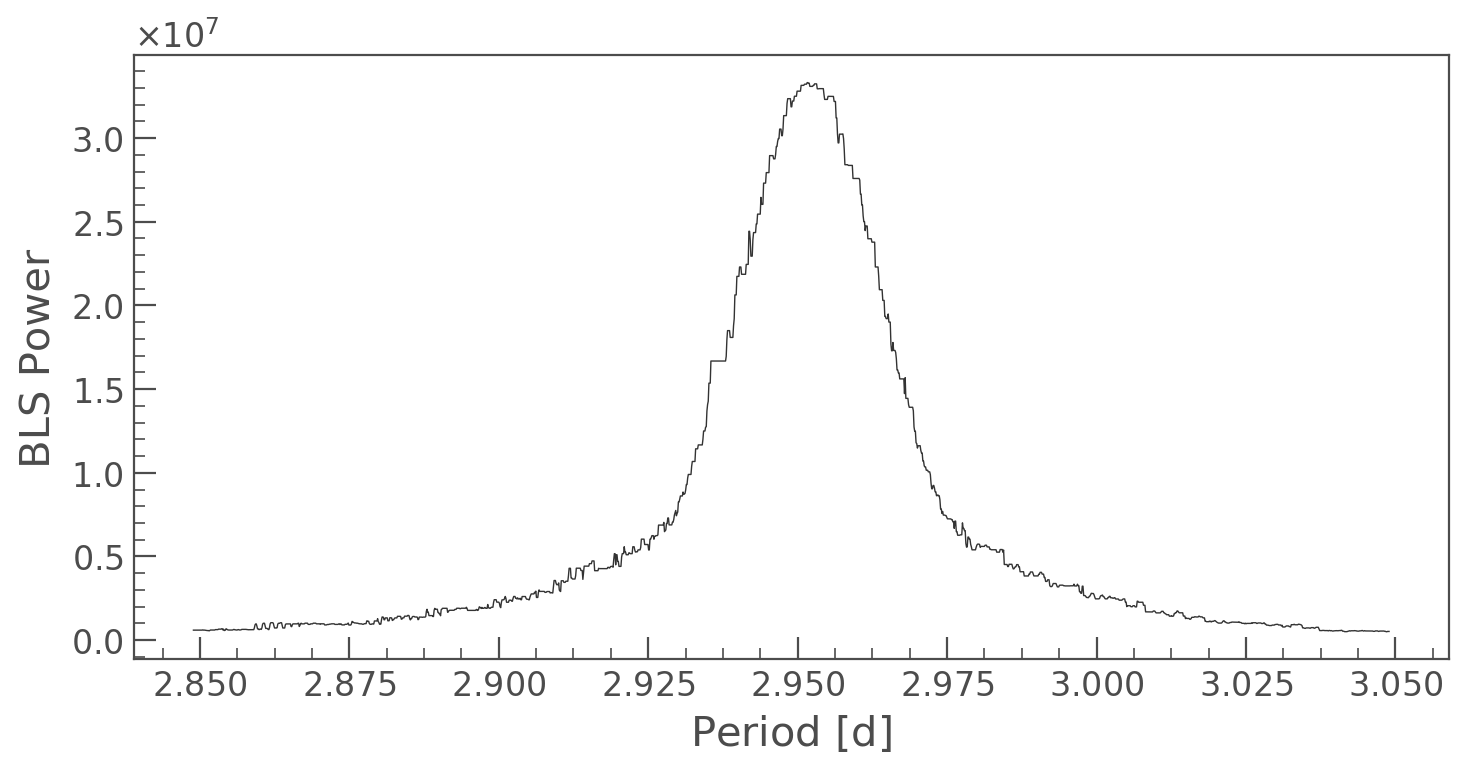

In [23]:
# Find the period and t0 using a BLS!
p = lc.to_periodogram('bls', duration=0.1, minimum_period=1, maximum_period=20)
period = p.period_at_max_power.value
p = lc.to_periodogram('bls', duration=0.1, minimum_period=period-0.1, maximum_period=period+0.1, frequency_factor=0.1)
p.plot()
period, t0 = p.period_at_max_power.value, p.transit_time_at_max_power

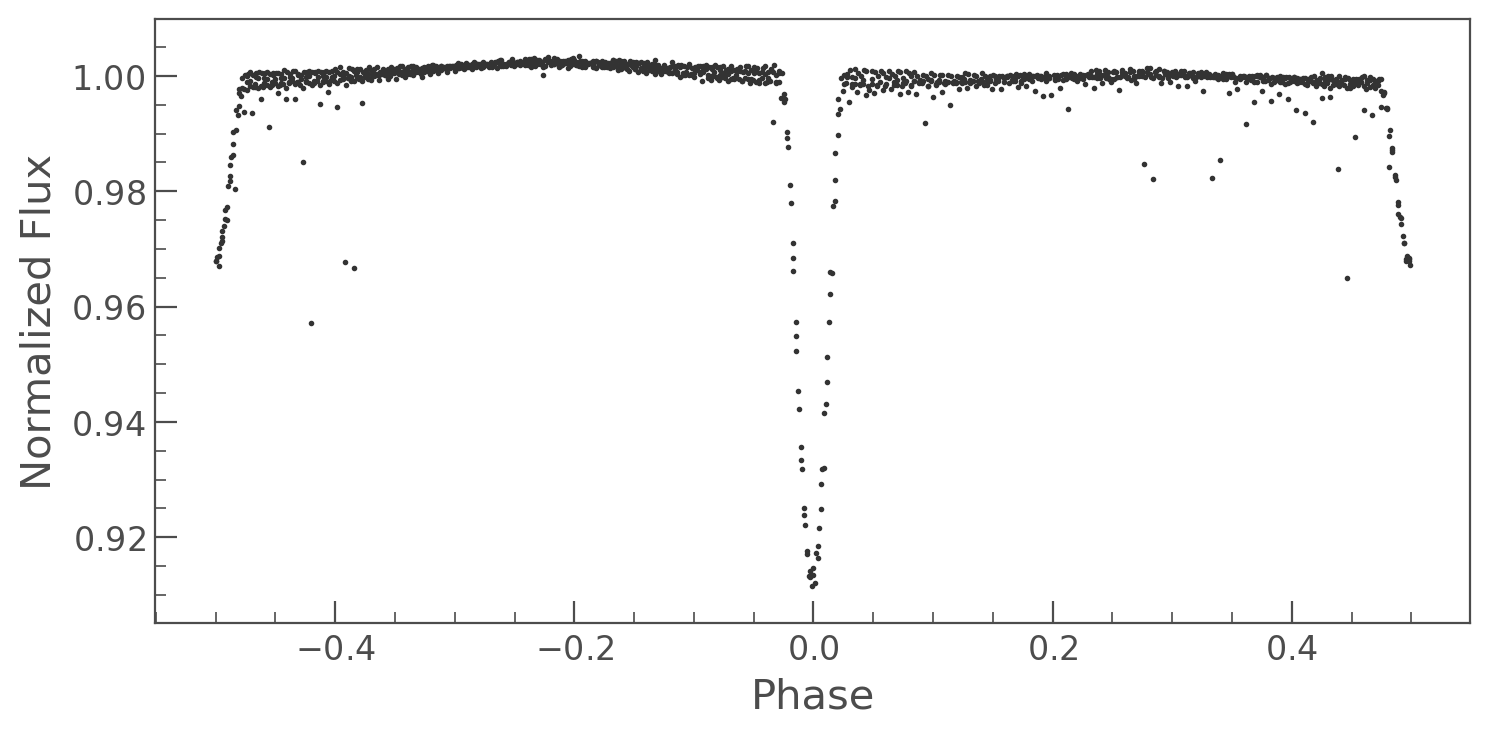

In [24]:
# Fold the light curve and take another look!
f = lc.fold(period, t0)
f.scatter()

Calculating Pixel Light Curves: 100%|██████████| 30/30 [00:02<00:00, 10.18it/s]
/Users/ch/miniconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1148: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


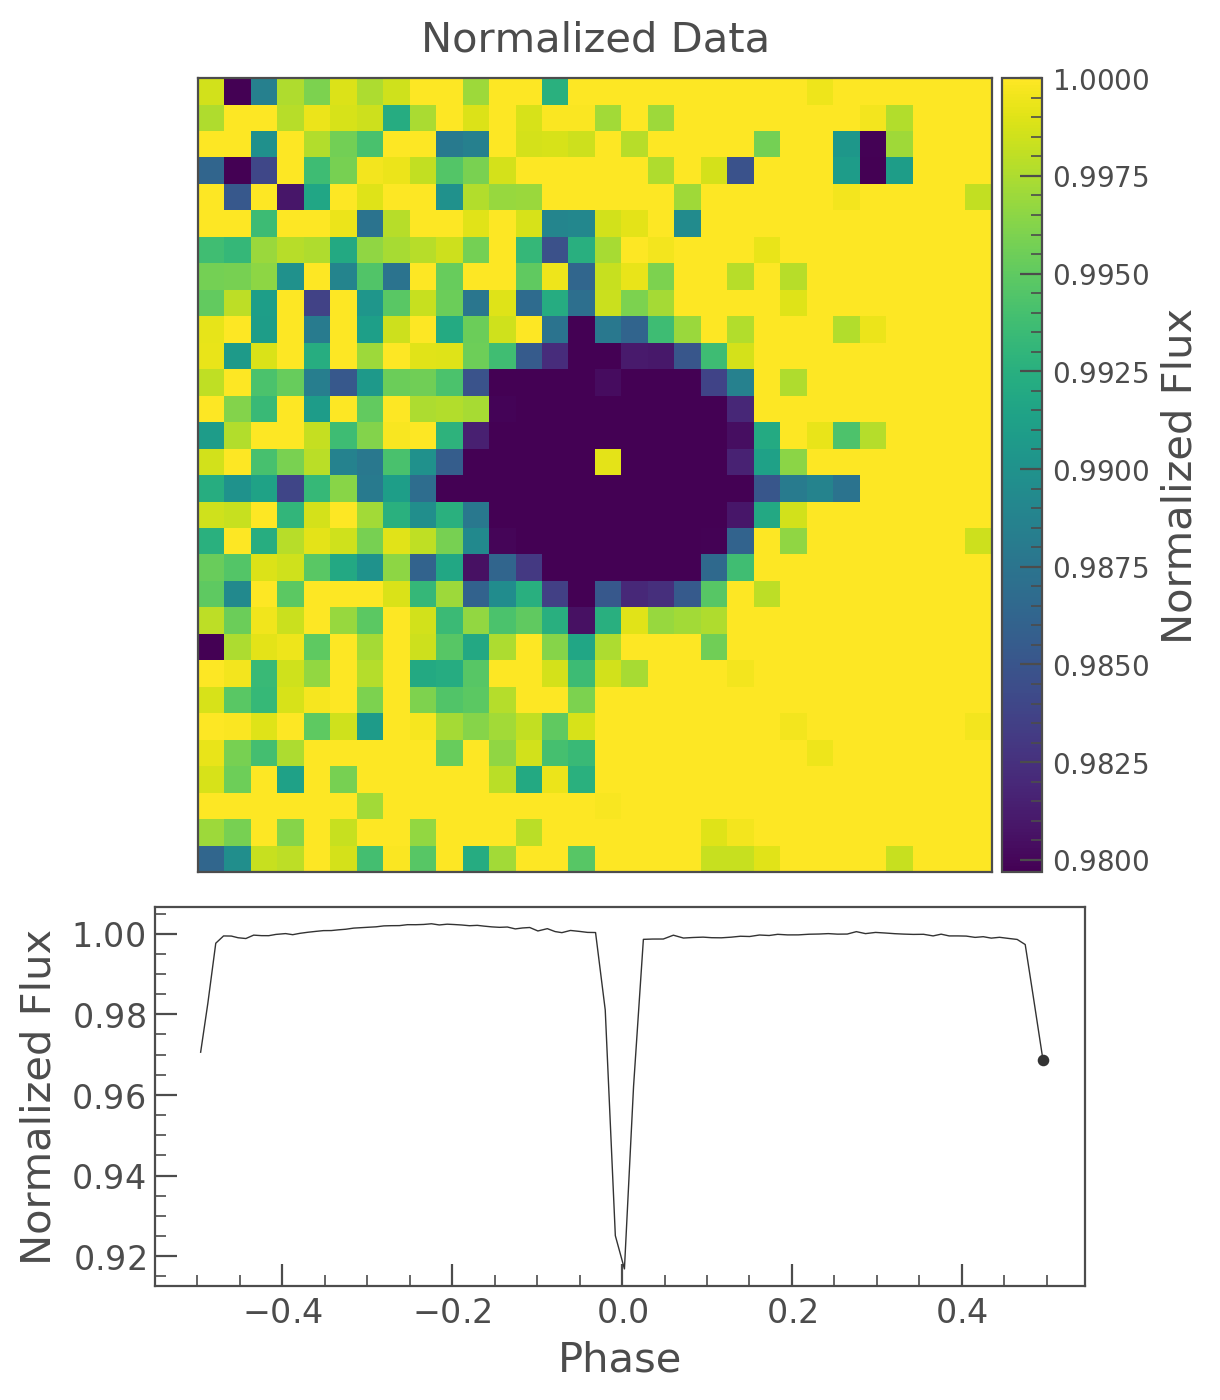

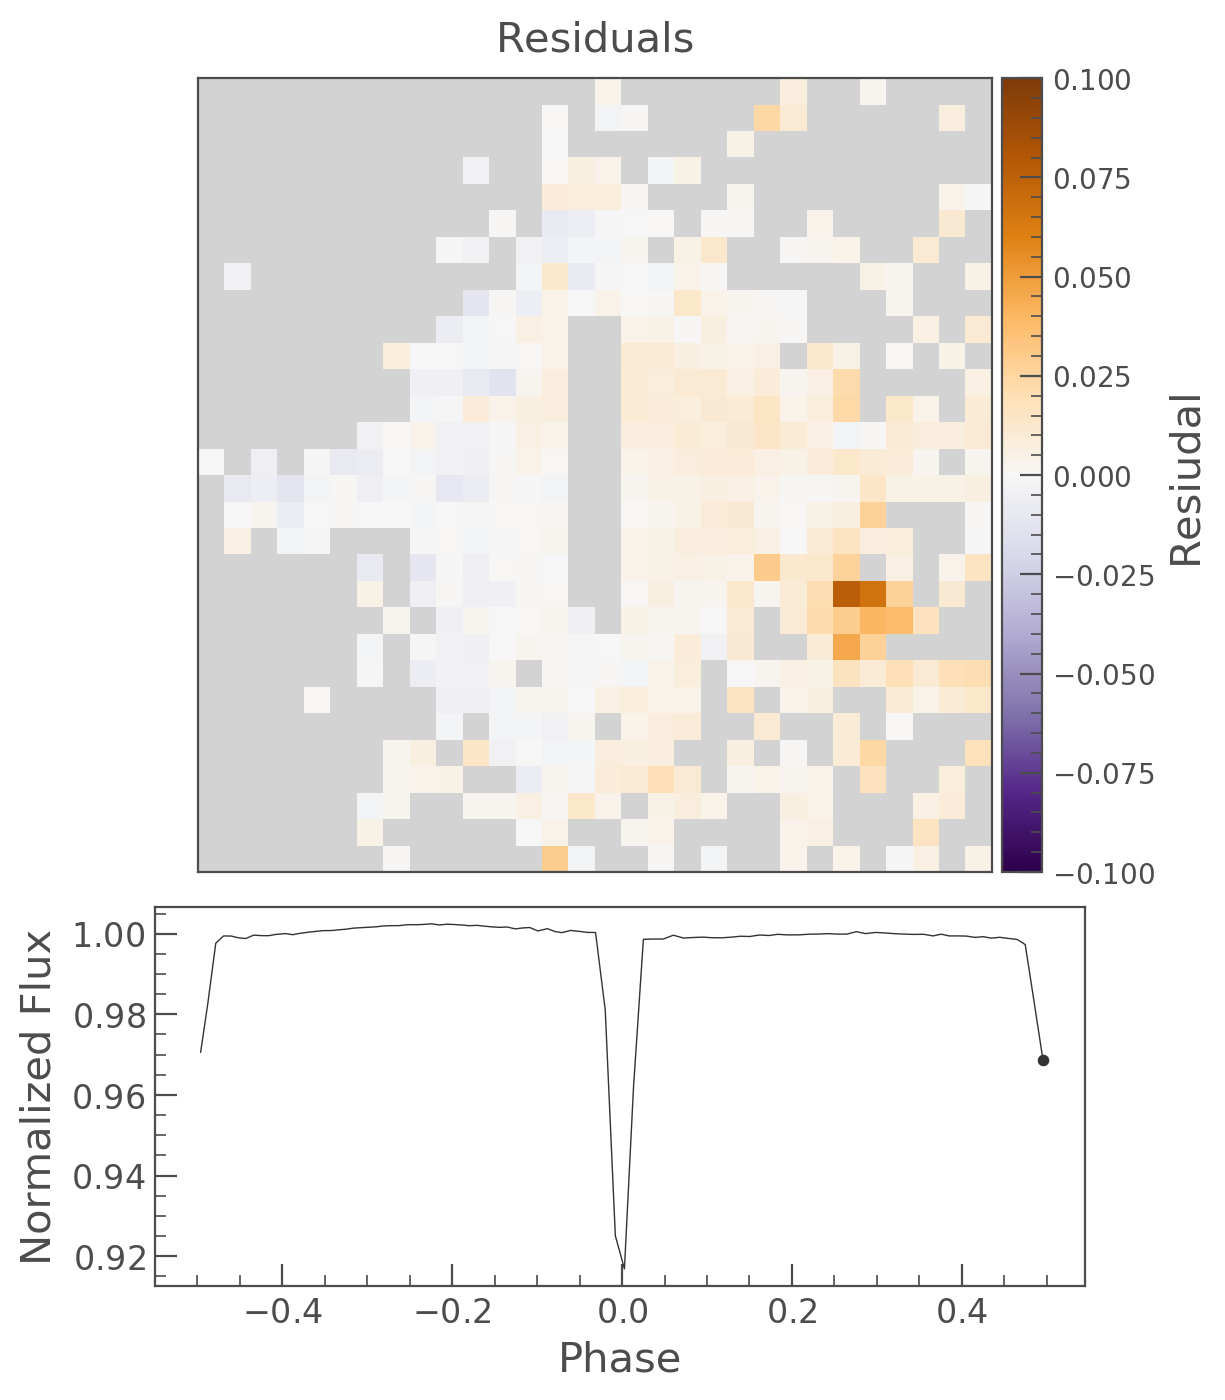

In [17]:
# Use Chromo to analyze! This will make movies in your current directory!
eb.analyze(raw_tpf, period, t0, name=tic);